In [1]:
# from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
insurance_data = pd.read_csv("../../data/raw/insurance.csv")

# divide into input feature and target(output) feature
X = insurance_data.drop(columns=["charges"])
y = insurance_data["charges"]


# features engineering
X = pd.get_dummies(X, columns=["region"], drop_first=True, dtype=int)   # One Hot Encoding
X["sex"] = X["sex"].map({"female": 1, "male": 0})   # mapping
X["smoker"] = X["smoker"].map({"yes": 1, "no": 0})  # mapping
X["age_smoker"] = X["age"] * X["smoker"]  # Interaction feature
X["bmi_smoker"] = X["bmi"] * X["smoker"]  # Interaction feature

# train & test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:

lasso_model = Lasso(alpha=0.5)   # alpha -> lamda value
# when you set alpha=0 -> recommaned that use linearRegression 
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE for alpha{0.5}: ", mse)

MSE for alpha0.5:  20918648.88982561


MSE for alpha0.001:  20922599.87103596
MSE for alpha0.1:  20921803.698431376
MSE for alpha0.15:  20921404.979615886
MSE for alpha0.5:  20918648.88982561
MSE for alpha0.6:  20917870.72408646
MSE for alpha0.8:  20916337.80425394
MSE for alpha1:  20914832.635089137
MSE for alpha2:  20908106.77995452
MSE for alpha3:  20901927.931570224
MSE for alpha5:  20890881.000633497
MSE for alpha10:  20872844.794796687
MSE for alpha20:  20877828.53237883
MSE for alpha30:  20937537.133939773
MSE for alpha40:  21046489.293890778
MSE for alpha50:  21196929.86960891
MSE for alpha100:  22423172.68602325


<Axes: >

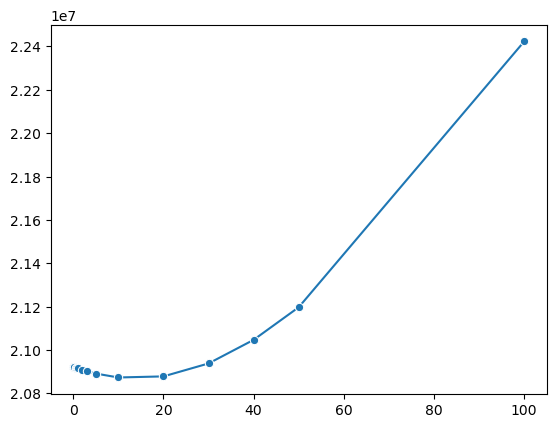

In [5]:
# but we don't know what is the actual vale of alpha
# So:- inalize this

import seaborn as sns

alphas = [0.001, 0.1, 0.15, 0.5, 0.6, 0.8, 1, 2, 3, 5, 10, 20, 30, 40, 50, 100]
mses = []

for a in alphas:
    lasso_model = Lasso(alpha=a)
    lasso_model.fit(X_train, y_train)
    
    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for alpha{a}: ", mse)
    mses.append(mse)

sns.lineplot(x=alphas, y=mses, marker="o")

In [6]:
""" LassoCV -> automatically finds best regularization strength (alpha)
using cross-va lidation. """
from sklearn.linear_model import LassoCV
a = [0.001, 0.1, 0.15, 0.5, 0.6, 0.8, 1, 2, 3, 5, 10, 20, 30, 40, 50, 100]

lasso_cv_model = LassoCV(
    alphas=a,
    cv=5, # 5-fold cross-validation
    max_iter=1000,  # max iterations for convergence | max optimization steps
    random_state=42  # reproducibility: its help when we rewrite same code -> same output 
)

lasso_cv_model.fit(X_train, y_train)

print("best alpha: ",lasso_cv_model.alpha_)

y_pred = lasso_cv_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("mse: ",mse)

# we can aslo calculate r2_score
r2 = r2_score(y_test, y_pred)
print("r2 =", r2)

best alpha:  0.001
mse:  20922599.87103596
r2 = 0.8652317499151699
